# Indentificação de espécie de pinguins através das características com SVM e Random Forest

penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

species: penguin species (Chinstrap, Adélie, or Gentoo)<br />
culmen_length_mm: culmen length (mm) - Anatomia, comprimento<br />
culmen_depth_mm: culmen depth (mm) - Anatomia, profundidade<br />
flipper_length_mm: flipper length (mm) - comprimento nadadeira<br />
body_mass_g: body mass (g)<br />
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)<br />
sex: penguin sex<br />





In [435]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import ipyplot
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline



In [436]:
labels = ['Chinstrap','Adeliae','Gentoo']
img_list = ['https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chinstrap_Penguin.jpg/375px-Chinstrap_Penguin.jpg',
            'https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Pygoscelis_adeliae.jpg/375px-Pygoscelis_adeliae.jpg',
            'https://upload.wikimedia.org/wikipedia/commons/0/0a/MADRE_PINGUINO_Y_CRIA.jpg']

ipyplot.plot_images(img_list, labels, img_width=200)  


In [437]:
df = pd.read_csv('datasets/penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [438]:
df = df = df.dropna()

In [439]:
# Removendo categorias inválidas

display(pd.unique(df['sex']))
df = df.drop(df[df['sex'] == '.'].index)
display(pd.unique(df['sex']))

array(['MALE', 'FEMALE', '.'], dtype=object)

array(['MALE', 'FEMALE'], dtype=object)

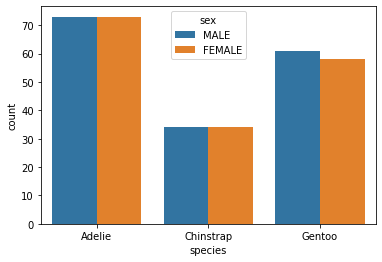

In [440]:
# Analisando o balanceamento dos dados através da quantidade de amostras por sexo e espécie
sns.countplot(x='species', hue='sex', data=df)

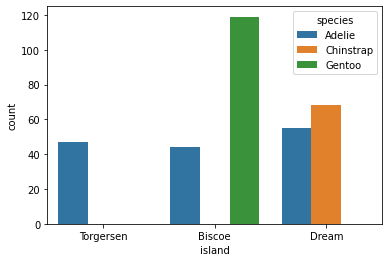

In [441]:
# Analisando as espécies existentes em cada região
sns.countplot(x='island', hue='species', data=df)

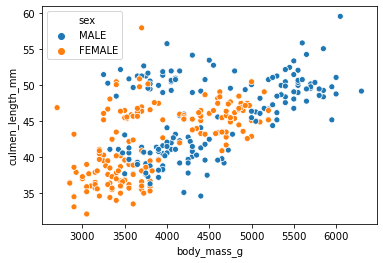

In [442]:
# Analise da anatomia das amostras por sexo (peso x comprimento).  
sns.scatterplot(x='body_mass_g', y='culmen_length_mm', hue="sex", data=df)

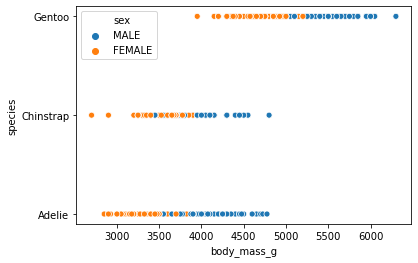

In [443]:
# Analise do peso de cada espécie por sexo. A Raça Gentoo é a espécie com mais massa, os machos apresentam mais massa em todas as espécies.
sns.scatterplot(x='body_mass_g', y='species', hue="sex", data=df)

In [444]:
encoder = preprocessing.LabelEncoder()
df['species'] = encoder.fit_transform(df.species)
df['sex'] = encoder.fit_transform(df.sex)


In [445]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 30.8+ KB


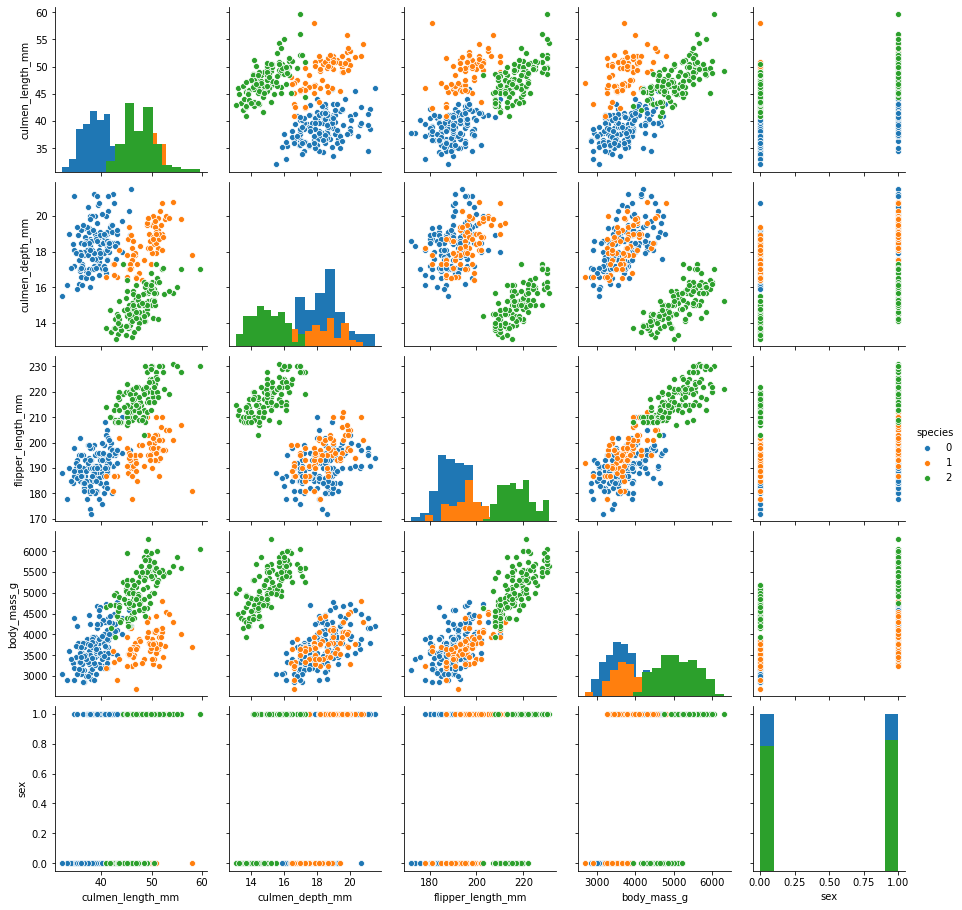

In [446]:
sns.pairplot(df, diag_kind="hist", hue="species")

In [447]:
X = df.drop(['island','species'], axis=1) 
y = df['species']

X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)

print('Score = %.5f' % score)

Score = 0.66000


In [449]:
# O SVM não obteve boa acurácia e não se adaptou bem aos dados

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70        40
           1       0.00      0.00      0.00        27
           2       0.90      0.85      0.88        33

    accuracy                           0.66       100
   macro avg       0.48      0.60      0.52       100
weighted avg       0.52      0.66      0.57       100

[[38  0  2]
 [26  0  1]
 [ 5  0 28]]


In [450]:
# Utilizando random forest 

model = RandomForestClassifier(n_estimators=10, n_jobs=-1)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)

print('Score = %.5f' % score)

Score = 0.94000


In [451]:
# Random forest apresentou ótimos resultados

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       0.96      0.81      0.88        27
           2       1.00      0.97      0.98        33

    accuracy                           0.94       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100

[[40  0  0]
 [ 5 22  0]
 [ 0  1 32]]
